In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
q1_data_path = './data/content/Jan-29-2024_Mar-31-2024.csv'
q2_data_path = './data/content/Apr-01-2024_Jun-30-2024.csv'
q3_data_path = './data/content/Jul-01-2024_Sep-30-2024.csv'

Q1 = pd.read_csv(q1_data_path)
Q2 = pd.read_csv(q2_data_path)
Q3 = pd.read_csv(q3_data_path)

# Add a 'Quarter' column to each DataFrame
Q1['Quarter'] = 0  # Q1: Jan to Mar
Q2['Quarter'] = 1  # Q2: Apr to Jun
Q3['Quarter'] = 2  # Q3: Jul to Sep

In [31]:
# Combine all quarters into one DataFrame
combined_df = pd.concat([Q1, Q2, Q3], ignore_index=True)
combined_df.drop(columns=['Post ID', 'Account ID', 'Account username', 'Account name', 'Description', 'Duration (sec)', 'Data comment', 'Date'], inplace=True)

print(combined_df.head())

       Publish time                                 Permalink    Post type  \
0  01/29/2024 16:00  https://www.instagram.com/p/C2tBjt4sTKl/     IG image   
1  03/30/2024 07:00  https://www.instagram.com/p/C5JBXtlO5Is/  IG carousel   
2  03/29/2024 06:00  https://www.instagram.com/p/C5GVzZyOwlo/     IG image   
3  03/28/2024 08:06  https://www.instagram.com/p/C5D_a3IugPF/     IG image   
4  03/26/2024 14:43  https://www.instagram.com/p/C4_jOiiOc_e/     IG image   

   Likes  Shares  Comments  Saves  Impressions  Reach  Follows  Plays  Quarter  
0     11       1         2      0        215.0  197.0      NaN    NaN        0  
1     66       1         7      0        398.0  290.0      NaN    NaN        0  
2     18       4         2      0        269.0  211.0      NaN    NaN        0  
3     43       6         3      0          NaN    NaN      NaN    NaN        0  
4     32       2         1      0        712.0  569.0      NaN    NaN        0  


In [32]:

# Convert 'Publish time' to a datetime format
combined_df['Publish time'] = pd.to_datetime(combined_df['Publish time'], format='%m/%d/%Y %H:%M')

# Create new fields from 'Publish time'
combined_df['Year'] = combined_df['Publish time'].dt.year
combined_df['Month'] = combined_df['Publish time'].dt.month
combined_df['Day'] = combined_df['Publish time'].dt.day
combined_df['Day of Week'] = combined_df['Publish time'].dt.strftime('%a')
combined_df['Hour'] = combined_df['Publish time'].dt.hour
combined_df = combined_df.drop(columns=['Publish time']) # Publish time no longer needed

# Display the updated DataFrame with more detailed fields
print(combined_df.head())

# Export the DataFrame to a CSV file
combined_df.to_csv('./data/content/combined_data.csv', index=False)



                                  Permalink    Post type  Likes  Shares  \
0  https://www.instagram.com/p/C2tBjt4sTKl/     IG image     11       1   
1  https://www.instagram.com/p/C5JBXtlO5Is/  IG carousel     66       1   
2  https://www.instagram.com/p/C5GVzZyOwlo/     IG image     18       4   
3  https://www.instagram.com/p/C5D_a3IugPF/     IG image     43       6   
4  https://www.instagram.com/p/C4_jOiiOc_e/     IG image     32       2   

   Comments  Saves  Impressions  Reach  Follows  Plays  Quarter  Year  Month  \
0         2      0        215.0  197.0      NaN    NaN        0  2024      1   
1         7      0        398.0  290.0      NaN    NaN        0  2024      3   
2         2      0        269.0  211.0      NaN    NaN        0  2024      3   
3         3      0          NaN    NaN      NaN    NaN        0  2024      3   
4         1      0        712.0  569.0      NaN    NaN        0  2024      3   

   Day Day of Week  Hour  
0   29         Mon    16  
1   30        

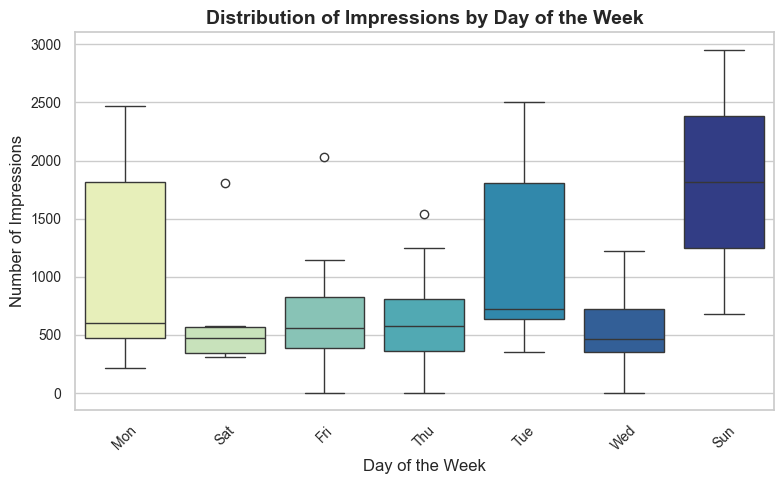

In [60]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Day of Week", y="Impressions", data=combined_df, hue="Day of Week", palette="YlGnBu")

# Add title and labels with Matplotlib styling
plt.title('Distribution of Impressions by Day of the Week', fontsize=14, weight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Impressions', fontsize=12)

# Adjust the ticks for better readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Tight layout to prevent overlaps
plt.tight_layout()

# Show the plot
plt.show()

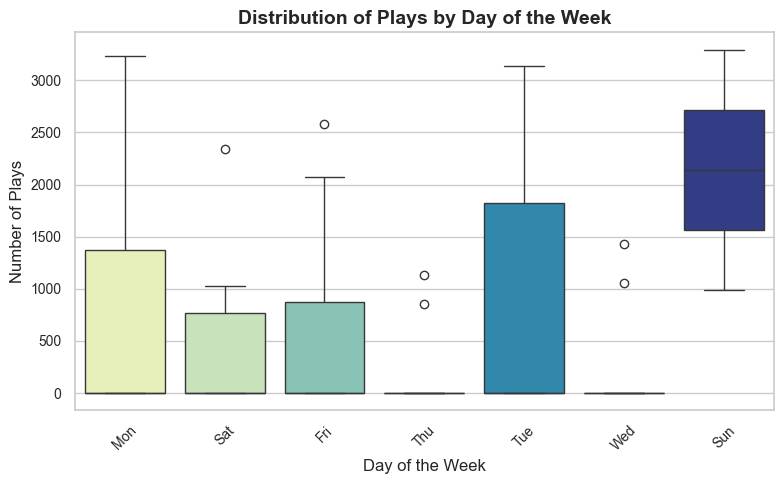

In [61]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Day of Week", y="Plays", data=combined_df, hue="Day of Week", palette="YlGnBu")

# Add title and labels with Matplotlib styling
plt.title('Distribution of Plays by Day of the Week', fontsize=14, weight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Plays', fontsize=12)

# Adjust the ticks for better readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Tight layout to prevent overlaps
plt.tight_layout()

# Show the plot
plt.show()

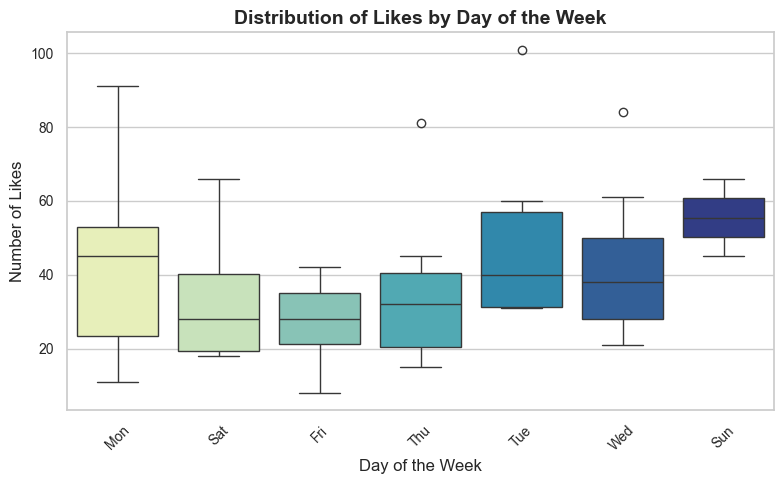

In [62]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Day of Week", y="Likes", data=combined_df, hue="Day of Week", palette="YlGnBu")

# Add title and labels with Matplotlib styling
plt.title('Distribution of Likes by Day of the Week', fontsize=14, weight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Likes', fontsize=12)

# Adjust the ticks for better readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Tight layout to prevent overlaps
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/09/_ffptp312fj33qw8f8_zqqgc0000gn/T/ipykernel_26539/2337963187.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = combined_df.groupby('Time Period')[interaction_fields].sum()


<Figure size 1200x800 with 0 Axes>

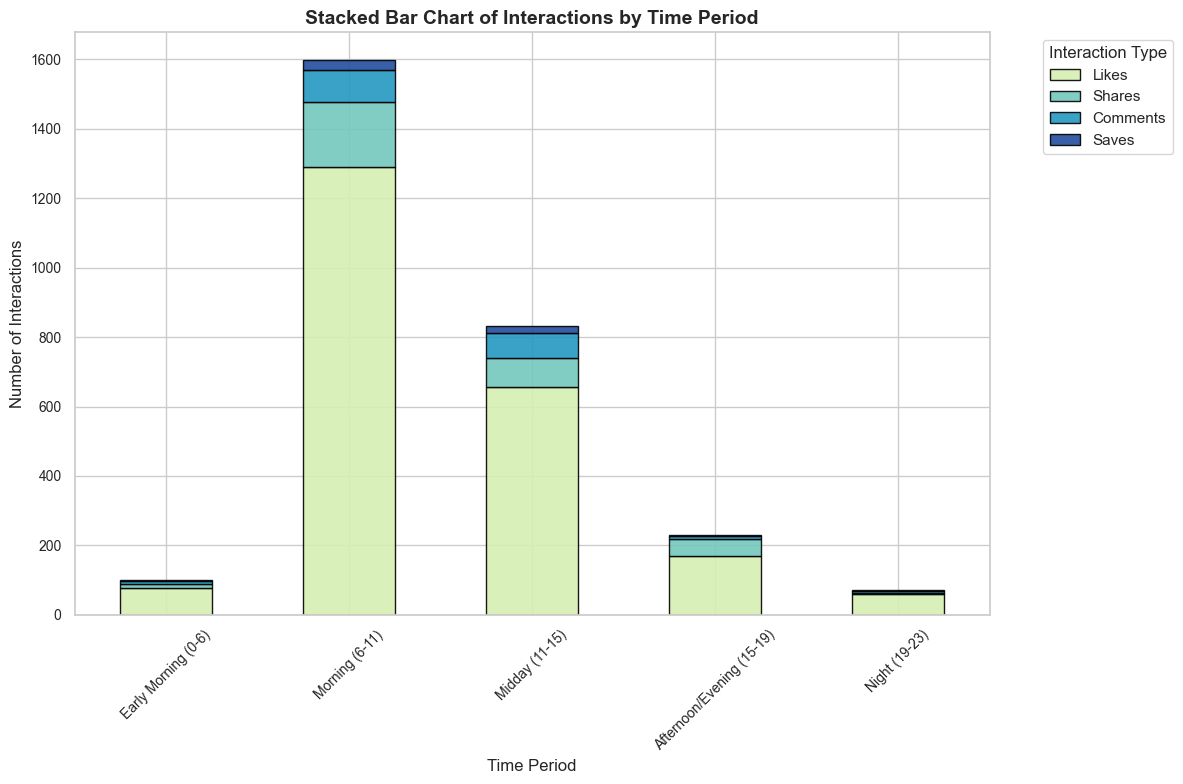

In [68]:
# Assuming combined_df is your DataFrame and interaction fields are known
interaction_fields = ['Likes', 'Shares', 'Comments', 'Saves']

# Define hour bins
bins = [0, 6, 11, 15, 19, 24]
bin_labels = ['Early Morning (0-6)', 'Morning (6-11)', 'Midday (11-15)', 'Afternoon/Evening (15-19)', 'Night (19-23)']

# Create a new column that categorizes each hour into a bin
combined_df['Time Period'] = pd.cut(combined_df['Hour'], bins=bins, labels=bin_labels, right=False, include_lowest=True)

# Group data by the new time period bins and sum the interaction fields
grouped_data = combined_df.groupby('Time Period')[interaction_fields].sum()

# Apply Seaborn styling
sns.set(style="whitegrid")

# Use the "YlGnBu" palette with custom colors
colors = sns.color_palette("YlGnBu", len(interaction_fields))

# Create a figure
plt.figure(figsize=(12, 8))

# Plot stacked bars for each interaction type, using logarithmic scale
grouped_data.plot(kind='bar', stacked=True, color=colors, figsize=(12, 8), edgecolor='black', alpha=0.9)

# Add titles and labels
plt.title('Stacked Bar Chart of Interactions by Time Period', fontsize=14, weight='bold')
plt.xlabel('Time Period')
plt.ylabel('Number of Interactions')

# Adjust legend and position it outside the plot
plt.legend(title='Interaction Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Make x-ticks more readable
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Show the plot with tight layout
plt.tight_layout()
plt.show()